In [3]:
#import thu vien
import pandas as pd 
import numpy as np



# Đọc dữ liệu
# Tải dữ liệu
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Classification']
df = pd.read_csv('C:/Users/ACER/Downloads/heart+disease/processed.cleveland.data', names=column_names, header=None, na_values='?')


df["Classification"] = df["Classification"].apply(lambda x: 1 if x > 0 else 0)
# Xử lý dữ liệu bị thiếu
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
#data set để test (không có cột Classification)
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  Classification  
0    3.0  0.0   6.0               0  
1    2.0  3.0   3.0               1  
2    2.0  2.0   7.0               1  
3    3.0  0.0   3.0               0  
4    1.0  0.0   3.0               0  


              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.69      0.82      0.75        11

    accuracy                           0.80        30
   macro avg       0.79      0.80      0.79        30
weighted avg       0.81      0.80      0.80        30



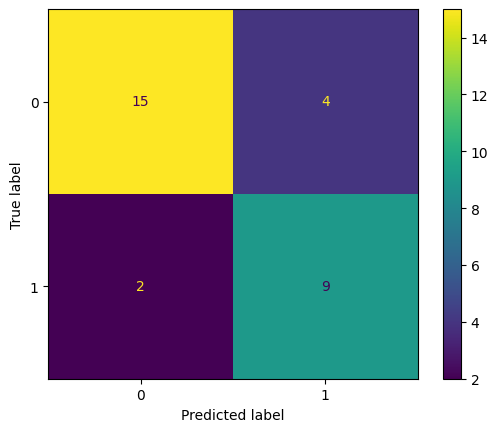

In [4]:
#data set để train
labels = df['Classification'].values.reshape(-1,1)
features = df.drop(columns = ['Classification']) 


# Áp dụng One-Hot Encoding cho các cột phân loại (categorical features)

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Giữ lại các cột số
)

# Tạo pipeline với Decision Tree và preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
feature_train, feature_test, label_train, label_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Huấn luyện mô hình
pipeline.fit(feature_train, label_train)

# Dự đoán và hiển thị confusion matrix
label_pred = pipeline.predict(feature_test)
ConfusionMatrixDisplay.from_estimator(pipeline, feature_test, label_test)
report = classification_report(label_test, label_pred)
print(report)